In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Question 3 ##

### Write a function MCpaths (Nt, Np, mu, sigma, dt) in Ro or Python to generate a set of simulated price paths for a stock following geometric Brownian motion. Use this function with expected annual return μ = 10%, standard deviation σ = 30%, and initial price S0 = 100. Let the number of time steps per path be Nt = 252 and let the number of paths be Np =10,000. (Include your own code with your submission.) ###

In [65]:

def MCpaths(Nt, Np, mu, sigma, dt):
    Matrix = np.zeros((Nt, Np))
    for i in range (1, int(Np+1)):
        a = np.random.standard_normal(Nt)
        cum_a = np.cumsum(a)
        for t in range(1, int(Nt+1)):
            Wt = cum_a[t-1]*np.sqrt(dt)
            St = S0*np.exp(mu-1/2*sigma**2)*np.exp(Wt*sigma)
            Matrix[t-1,i-1]=St
    return Matrix

In [66]:
S0=100

### (a) Plot a histogram of the terminal values of the paths. What are the mean and standard deviation of the distribution? ###

In [67]:
mtest = MCpaths(252, 10000, 0.1, 0.3, 1/252)

In [68]:
final_prices = mtest[251][:]
print(final_prices)

[ 120.01418039  102.13592868  102.13966681 ...,   93.44165058   79.45319276
   72.66661692]


#### Histogram of the terminal values of the paths ####

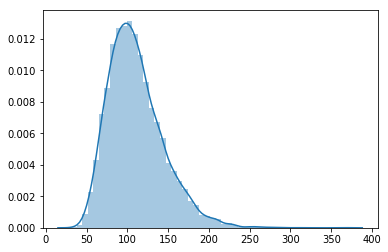

In [69]:
ax = sns.distplot(final_prices)
plt.show(ax)

#### Mean of terminal values ####

In [70]:
dist_mean = np.mean(final_prices)
print(dist_mean)

110.38776649


#### Standard deviation of temrinal values ####

In [71]:
dist_std = np.std(final_prices)
print(dist_std)

33.7569401107


### (b) What is the average number of returns to the origin? That is, how many times, after the first step, does St hit or cross the initial value S0? ###

In [72]:
def CountRetOrigin (array,p,t,init_value):
    count = 0
    for y in range(0,p):
        for i in range(0,t):
            if array[i+1][y] < init_value < array[i][y]:
                count = count+1
            elif array[i+1][y] > init_value > array[i][y]:
                count=count +1
            else:
                count =count
    return count

In [73]:
CountRetOrigin(mtest, 10000, 251, 100)

79107

In [74]:
def avgRetOrigin(array,p,t,init_value):
    avg_ret_origin = (CountRetOrigin (array,p,t,init_value))/p
    print(avg_ret_origin)
    return

In [75]:
avgRetOrigin(mtest, 10000, 251, 100)

7.9107


### (c) Consider a one-year European call option on the stock with strike price K = 100. What is the empirical mean value, averaged over all simulated paths, of the terminal payoff CNt = max(SNt − K, 0)? ###

In [81]:
def payout_Europ_call (array, strike_p):
    payout_matrix = np.zeros(9999)
    for i in range (0, 9999):
        payout_matrix[i] = array[i]-strike_p
        if payout_matrix[i]>0:
            payout_matrix[i]=payout_matrix[i]
        else:
            payout_matrix[i]=0
    print(payout_matrix)
    return payout_matrix

In [88]:
payout_strike_100=payout_Europ_call(final_prices, 100)

In [90]:
payoff_mean = np.mean(payout_strike_100)
print(payoff_mean)

16.420626211


### (d) Now consider a one-year European put option, instead of a call, with the same strike price, K = 100. What is the corresponding value? Should you evaluate the put option using the same random price prices used to evaluate the call above, or should a new set be drawn independently? ###

In [91]:
def payout_Europ_put(array, strike_p):
    payout_matrix = np.zeros(9999)
    for i in range (0, 9999):
        payout_matrix[i] = strike_p - array[i]
        if payout_matrix[i]>0:
            payout_matrix[i]=payout_matrix[i]
        else:
            payout_matrix[i]=0
    print(payout_matrix)
    return payout_matrix

In [92]:
payout_put_strike_100=payout_Europ_put(final_prices, 100)
print(payout_put_strike_100)

[  0.           0.           0.         ...,   0.           6.55834942
  20.54680724]
[  0.           0.           0.         ...,   0.           6.55834942
  20.54680724]


In [96]:
payoff_put_mean = np.mean(payout_put_strike_100)
print(payoff_put_mean)

7.99997236373


## Question 4 ##

In [98]:
PS2_data = pd.read_excel("/Users/jeremyobadia/Desktop/MIT Summer Term/Maths/PS2-data.xlsx")

In [99]:
print(PS2_data)

    Observation  SecID      x       y
0             1  17978  0.008  0.0814
1             2  14277  0.005  0.0573
2             3  12300  0.005  0.0568
3             4  14277  0.008  0.0677
4             5  14277  0.011  0.0781
5             6  18056  0.008  0.0525
6             7  18056  0.008  0.0704
7             8  18056  0.008  0.0689
8             9  12835  0.005  0.0627
9            10  12835  0.006  0.0627
10           11  12835  0.014  0.1196
11           12  14277  0.010  0.0746
12           13  14277  0.013  0.1274
13           14  14277  0.007  0.0642
14           15  12300  0.004  0.0426
15           16  14277  0.006  0.0608
16           17  17978  0.012  0.0913
17           18  12300  0.009  0.0881
18           19  17978  0.007  0.0726
19           20  17978  0.006  0.0613
20           21  18056  0.008  0.0576
21           22  14277  0.012  0.0815
22           23  12835  0.004  0.0627
23           24  12835  0.007  0.0627
24           25  14277  0.009  0.0711
25          

In [107]:
xi_mean = np.mean(PS2_data['x'])
xi_std = np.std(PS2_data['x'])
print(xi_mean)
print(xi_std)

0.009000000000000006
0.00316227766016838


In [105]:
yi_mean=np.mean(PS2_data['y'])
yi_std = np.std(PS2_data['y'])
print(yi_mean)
print(yi_std)

0.07500545454545456
0.01935049370459499


In [110]:
corr = np.correlate(PS2_data['x'],PS2_data['y'])
print(corr)

[ 0.0398778]


In [138]:
sorted_data = PS2_data.sort_values(by = ['SecID'])
print(sorted_data)

    Observation  SecID      x       y
36           37  12300  0.012  0.1084
30           31  12300  0.011  0.0833
38           39  12300  0.008  0.0695
41           42  12300  0.014  0.0996
43           44  12300  0.010  0.0804
17           18  12300  0.009  0.0881
14           15  12300  0.004  0.0426
34           35  12300  0.013  0.0758
2             3  12300  0.005  0.0568
51           52  12300  0.007  0.0482
52           53  12300  0.006  0.0724
8             9  12835  0.005  0.0627
40           41  12835  0.008  0.0627
26           27  12835  0.011  0.0735
23           24  12835  0.007  0.0627
22           23  12835  0.004  0.0627
50           51  12835  0.009  0.0627
33           34  12835  0.013  0.1042
44           45  12835  0.012  0.0888
10           11  12835  0.014  0.1196
9            10  12835  0.006  0.0627
32           33  12835  0.010  0.0627
31           32  14277  0.004  0.0539
15           16  14277  0.006  0.0608
21           22  14277  0.012  0.0815
13          

In [209]:
##SECID12300 = sorted_data[0:11]
##print(SECID12300)
##x_mean_ID12300 = np.mean(SECID12300['x'])
##print(x_mean_ID12300)

In [210]:
##SecID_12835 = sorted_data[11:22]
#print(SecID_12835)
##testtt = SecID_12835['SecID'].iloc[0]
##print(testtt)
##test12835 = np.mean(SecID_12835['x'])
##print(test12835)

In [207]:
def calc_by_sec(df, obs, groups):
    for i in range (0, obs, groups):
        
        SecID = df[i:i+groups]
        val = df['SecID'].iloc[i]
        print('\n''Values for ID',val)
        #print(SecID)
        mean_x_ID = np.mean(SecID['x'])
        print('Mean of xi for security', val,'=',mean_x_ID)
        std_x_ID = np.std(SecID['x'])
        print('Standard deviation of xi for security', val, '=',std_x_ID)
        mean_y_ID = np.mean(SecID['y'])
        print('\n''Mean of yi for security', val,'=',mean_y_ID)    
        std_y_ID = np.std(SecID['y'])
        print('Standard deviation of yi for security', val,'=',std_y_ID)    
        corr_ID = np.correlate(SecID['x'], SecID['y'])
        print('\n''Correlation between xi and yi for security', val, '=',corr_ID)
    return

In [208]:
calc_by_sec(sorted_data, 55, 11)


Values for ID 12300
Mean of xi for security 12300 = 0.009000000000000001
Standard deviation of xi for security 12300 = 0.003162277660168379

Mean of yi for security 12300 = 0.0750090909090909
Standard deviation of yi for security 12300 = 0.019370242151086688

Correlation between xi and yi for security 12300 = [ 0.007976]

Values for ID 12835
Mean of xi for security 12835 = 0.009000000000000001
Standard deviation of xi for security 12835 = 0.0031622776601683794

Mean of yi for security 12835 = 0.07500000000000001
Standard deviation of yi for security 12835 = 0.019290883386153722

Correlation between xi and yi for security 12835 = [ 0.0079754]

Values for ID 14277
Mean of xi for security 14277 = 0.009
Standard deviation of xi for security 14277 = 0.0031622776601683794

Mean of yi for security 14277 = 0.075
Standard deviation of yi for security 14277 = 0.01935932943992732

Correlation between xi and yi for security 14277 = [ 0.0079747]

Values for ID 17978
Mean of xi for security 17978 =